# Machine learning and feature selection for undestanding the most important features in predicting homicide rate in brazilian cities

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span><ul class="toc-item"><li><span><a href="#Business-Context" data-toc-modified-id="Business-Context-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Context</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objective</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Undestanding" data-toc-modified-id="Data-Undestanding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Undestanding</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Removing-unecessary-features" data-toc-modified-id="Removing-unecessary-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Removing unecessary features</a></span></li><li><span><a href="#Adding-new-features" data-toc-modified-id="Adding-new-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adding new features</a></span></li><li><span><a href="#Removing-features-with-more-than-30%-of-null-values" data-toc-modified-id="Removing-features-with-more-than-30%-of-null-values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Removing features with more than 30% of null values</a></span></li><li><span><a href="#Filling-null-values" data-toc-modified-id="Filling-null-values-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Filling null values</a></span></li><li><span><a href="#Identifying-features-with-negative-values" data-toc-modified-id="Identifying-features-with-negative-values-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Identifying features with negative values</a></span></li><li><span><a href="#Visualizing-data-distribution" data-toc-modified-id="Visualizing-data-distribution-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Visualizing data distribution</a></span></li><li><span><a href="#Handling-features-with-multicollinearity" data-toc-modified-id="Handling-features-with-multicollinearity-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Handling features with multicollinearity</a></span><ul class="toc-item"><li><span><a href="#Dropping-features-with-high-correlation" data-toc-modified-id="Dropping-features-with-high-correlation-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Dropping features with high correlation</a></span></li><li><span><a href="#Dropping-features-with-correlation-close-to-zero-with-dependent-variable" data-toc-modified-id="Dropping-features-with-correlation-close-to-zero-with-dependent-variable-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Dropping features with correlation close to zero with dependent variable</a></span></li></ul></li><li><span><a href="#Data-standardization" data-toc-modified-id="Data-standardization-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Data standardization</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Boruta" data-toc-modified-id="Boruta-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Boruta</a></span></li><li><span><a href="#Recursive-Feature-Elimination-(RFE)" data-toc-modified-id="Recursive-Feature-Elimination-(RFE)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Recursive Feature Elimination (RFE)</a></span></li><li><span><a href="#Recursive-Feature-Addition-(RFA)" data-toc-modified-id="Recursive-Feature-Addition-(RFA)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Recursive Feature Addition (RFA)</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

## Business Understanding

### Business Context

A violência urbana é um problema enfrentado em diversos locais do mundo, no qual questões históricas, políticas, culturais e econômicas contribuem para o seu aumento. 

Um dos indicadores mais utilizados para medição da violência é a taxa de homicídios, que consiste no número de homicídios ocorridos em um ano para cada 100.000 habitantes. Segundo relatório anual da ONG mexicana Seguridad, Justicia y Paz (2021), dos 50 municípios com maiores taxas de homicídio do mundo, 11 são brasileiros, o que reforça como o nosso país ainda carece de medidas voltadas para a solução dessa questão.

### Objective

A fim de oferecer uma melhor compreensão a respeito desse problema e fornecer informações que auxiliem o processo de tomada de decisão na segurança pública, o presente trabalho realiza uma investigação com uso de técnicas matemáticas e estatísticas, a fim de identificar quais são os indicadores socioeconômicos mais importantes na previsão da taxa de homicídios dos municípios brasileiros.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import xgboost as xgb
import warnings
import json

from scipy.stats import shapiro
from shaphypetune import BoostSearch, BoostBoruta, BoostRFE, BoostRFA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import FeatureImportances

warnings.simplefilter('ignore')

## Data Undestanding

### Data Collection

Os dados utilizados na análise foram obtidos a partir da plataforma Atlas Brasil (http://www.atlasbrasil.org.br/acervo/biblioteca), de forma pública e gratuita. A seguir são mostradas as tabelas utilizadas, assim como seus respectivos conteúdos :
- **"DADOS_MUNICIPIOS.xlsx"**: contém informações de identificação dos municípios brasileiros, tais como seu código identificador, nome, estado e região.
- **"Dados_registro_administrativo_total_2013_2017.xlsx"**: contém indicadores de educação, saúde, infraestrutura e economia de todos os municípios brasileiros entre os anos de 2013 e 2017.

A função criada a seguir realiza a importaçaõ dos dados e a junção de ambas as tabelas. A fim se ter uma amostra com registros mais uniformes, foi feito um filtro para selecionar apenas municípios com mais de 100.000 habitantes, dado que estes são responsáveis por mais de 50% dos homicídios do país.

In [2]:
def load_data():

    df = pd.read_excel("DADOS_MUNICIPIOS.xlsx")

    df = df[['COD_MUNICIPIO_7', 'NOME_MUNICIPIO', 'UF','REGIAO']]

    df.columns = ['IBGE7', 'NOME', 'UF','REGIAO']

    adm_data = pd.read_excel(
        "Dados_registro_administrativo_total_2013_2017.xlsx")

    adm_data = adm_data.drop(columns=['NOME', 'DESAGREGACAO'])

    df = df.merge(adm_data, on='IBGE7')

    return df

In [3]:
df = load_data()
df.head()

,IBGE7,NOME,UF,REGIAO,ANO,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,...,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,1100015,ALTA FLORESTA D OESTE,RO,Norte,2013,99.26,100.0,0.74,NaN,25.8,...,100.0,0.51,66.02,20.0,0.0,NaN,NaN,NaN,NaN,25728
1,1100015,ALTA FLORESTA D OESTE,RO,Norte,2014,99.42,100.0,0.58,NaN,24.3,...,100.0,0.28,66.69,20.0,0.0,NaN,NaN,NaN,NaN,25652
2,1100015,ALTA FLORESTA D OESTE,RO,Norte,2015,100.00,100.0,NaN,NaN,23.3,...,NaN,0.52,64.81,20.0,0.0,NaN,NaN,NaN,NaN,25578
3,1100015,ALTA FLORESTA D OESTE,RO,Norte,2016,100.00,100.0,NaN,NaN,21.6,...,NaN,1.89,65.05,20.0,0.0,NaN,NaN,NaN,NaN,25506
4,1100015,ALTA FLORESTA D OESTE,RO,Norte,2017,100.00,100.0,NaN,NaN,19.9,...,NaN,0.52,65.44,10.0,0.0,NaN,NaN,NaN,NaN,25437


In [4]:
df.shape

(27850, 83)

### Exploratory Data Analysis

Foi realizada uma análise exploratória para identificar o melhor perfil de município para incluir no trabalho. O critério utilizado foi a população do município, dado que municípios mais populosos podem apresentar condições bastante diferentes de municípios menos populosos. 

Para tal, foi criada uma função que calcula a quantidade de homicídios para cada registro a partir da sua Taxa de homicídíos (TXMOHOMI) e População total (POP_TOT). Em seguida, a função faz uma busca e calcula o total de homicídios registrados nos municípios de acordo com a sua população em ordem decrescente. Por fim, é calculado um valor cujos municípios que contém uma população maior ou igual a esse valor concentrem cerca de 65% dos registros de homicídios no Brasil e um novo conjunto de dados filtrado por essa condição é retornado.

In [5]:
def homicide_concentration(df,p):  
    
    df['HOMICIDIOS'] = (df['POP_TOT']*df['TXMOHOMI'])/100000
    
    for i in reversed(range(0,df['POP_TOT'].max(),1000)):

        perc = (df.loc[df.POP_TOT > i]['HOMICIDIOS'].sum())/(df['HOMICIDIOS'].sum())*100
    
        if round(perc) >= p:
        
            print('Municípios com mais de {} habitantes concentram mais de 60% dos homicídios no Brasil entre 2013 e 2017'.format(i))
        
            break
           
    df = df.drop(columns='HOMICIDIOS')    
            
    df = df.loc[df.POP_TOT > i ]
        
    return df

In [6]:
df = homicide_concentration(df,60)

Municípios com mais de 115000 habitantes concentram mais de 60% dos homicídios no Brasil entre 2013 e 2017


In [7]:
df.shape

(1312, 83)

## Data Preparation

### Removing unecessary features

A seguir, campos contendo o código identificador, o nome, o estado e o ano do registro foram excluídos 
a fim de deixar o conjunto de dados apenas com as características de interesse.

In [8]:
df = df.drop(columns=['IBGE7', 'NOME', 'UF', 'REGIAO', 'ANO'])
df.shape

(1312, 78)

### Adding new features

A fim de tornar o conjunto de dados mais enxuto, as características Percentual de mães que tiveram filhos entre 10 e 14 anos (TXMAE10A14) e Percentual de mães que tiveram filhos entre 15 e 19 anos (TXMAE15A19) foram condensadas em um só campo.

In [9]:
df['TXMAE10A19'] = df['TXMAE10A14'] + df['TXMAE15A19']
df = df.drop(columns=['TXMAE10A14', 'TXMAE15A19'])

print(df.shape)

(1312, 77)


### Removing features with more than 30% of null values

Como primeiro passo na preparação dos dados, foi realizada uma análise para identificar a quantidade de valores nulos em cada característica.

<AxesSubplot:>

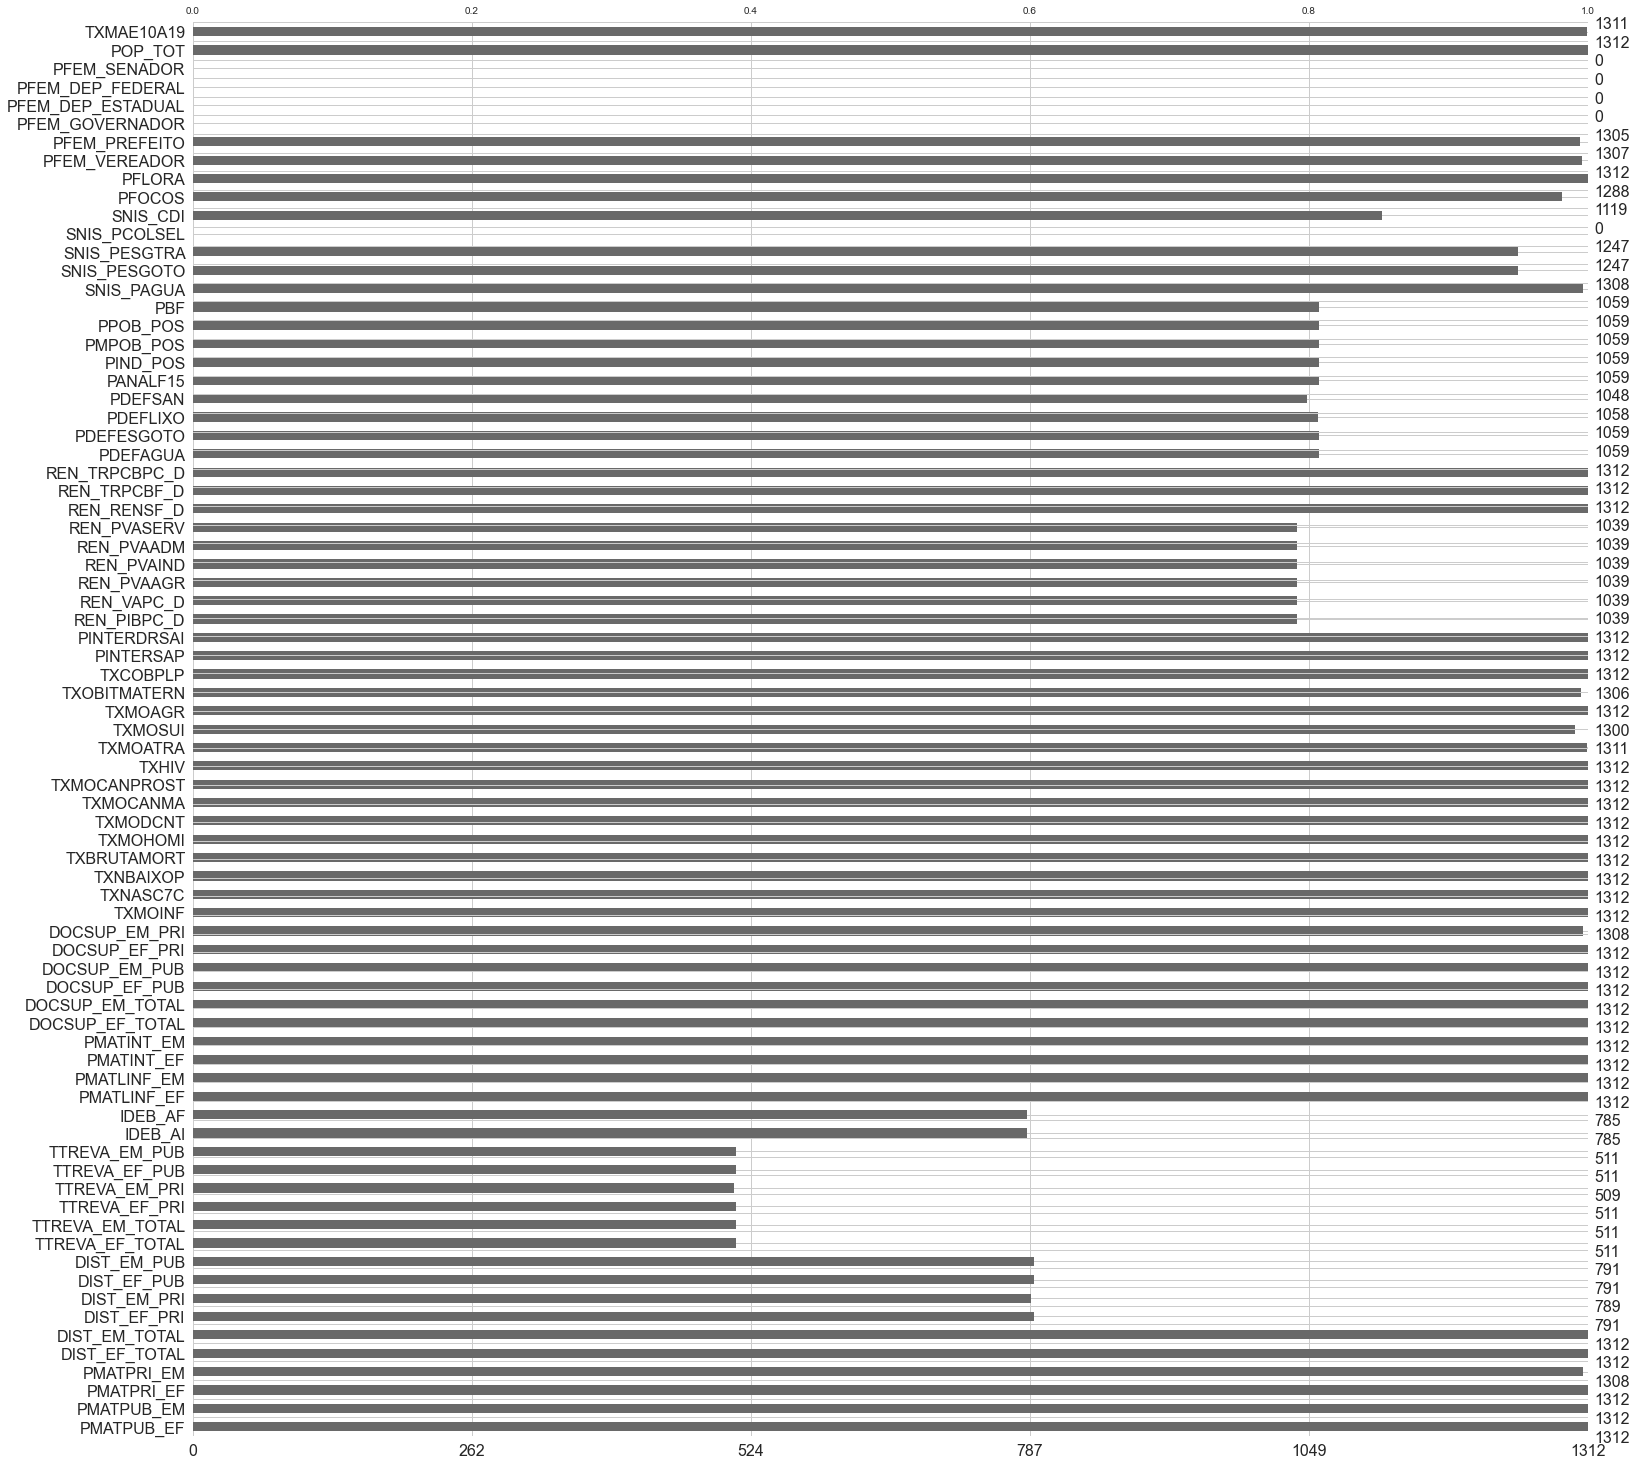

In [10]:
msno.bar(df)

É possível identificar que há características com total ausência de dados, assim como outras com ausência parcial. Para tal, foi determinado o critério de manter apenas características com ao menos 70% dos dados não nulos.

In [11]:
def drop_nan_columns(df):

    df1 = df.dropna(axis=1, thresh=df.shape[0] * 0.7)

    return df1

In [12]:
df1 = drop_nan_columns(df)

In [13]:
df1.shape

(1312, 60)

A seguir, podem ser vistas algumas das características que foram excluídas do conjunto de dados, tais como Taxa de reprovação no ensino médio da rede pública (TTREVA_EM_PUB), Distorção idade-série no ensino médio da rede pública (DIST_EM_PUB), Percentual de governadores do sexo feminino (PFEM_GOVERNADOR), Taxa de reprovação no ensino fundamental  da rede privada (TTREVA_EF_PRI), entre outras.

In [14]:
list(set(df.columns) - set(df1.columns))

['PFEM_DEP_FEDERAL',
 'TTREVA_EM_TOTAL',
 'PFEM_SENADOR',
 'DIST_EM_PRI',
 'TTREVA_EM_PRI',
 'TTREVA_EF_PRI',
 'DIST_EM_PUB',
 'TTREVA_EM_PUB',
 'IDEB_AI',
 'DIST_EF_PRI',
 'TTREVA_EF_PUB',
 'TTREVA_EF_TOTAL',
 'DIST_EF_PUB',
 'IDEB_AF',
 'SNIS_PCOLSEL',
 'PFEM_DEP_ESTADUAL',
 'PFEM_GOVERNADOR']

### Filling null values

Após a exclusão de características com muitos valores nulos, foi criada uma função que realiza a imputação de valores nos registros que contém valores nulos restantes, por meio de Regressão Linear Múltipla de forma interativa entre os dados.

In [15]:
print('Total de valores nulos:', df1.isna().sum().sum())

Total de valores nulos: 4318


In [16]:
def fil_missing_data(df1):

    imp = IterativeImputer(random_state=0)
    imp.fit_transform(df1)

    columns = df1.columns

    df2 = pd.DataFrame(imp.fit_transform(df1))
    df2.columns = columns

    return df2

In [17]:
df2 = fil_missing_data(df1)

Ao final, pode ser visto que não restou mais nenhum valor nulo no conjunto de dados.

In [18]:
print('Total de valores nulos após da limpeza:', df2.isna().sum().sum())

Total de valores nulos após da limpeza: 0


### Identifying features with negative values

Ao realizar o preenchimento dos valores nulos, é possível que sejam estimados valores negativos para os registros, dado que o modelo utiliza Regressão Linear Múltipla. Logo, foi realizada uma investigação para entender quais características apresentam algum valor negativo em seus registros, assim como a sua quantidade de registros negativos.

In [19]:
def columns_with_neg_values(df):

    columns_with_neg_values = {}

    for i in df.columns:

        if df[df[i] < 0].shape[0] > 0:

            columns_with_neg_values[i] = df[df[i] < 0].shape[0]

    return columns_with_neg_values

In [20]:
print("Colunas com registros negativos: ")
columns_with_neg_values(df2)

Colunas com registros negativos: 


{'PMATPRI_EM': 4,
 'REN_PVAIND': 1,
 'PDEFSAN': 6,
 'SNIS_PESGOTO': 17,
 'SNIS_PESGTRA': 1,
 'PFOCOS': 12}

As características que apresentam registros com valores negativos são o Percentual de matrículas da rede privada no ensino médio (PMATPRI_EM), Participação da Indústria no Valor Adicionado (REN_PVAIND), Percentual de pessoas sem abastecimento de água adequado (PDEFAGUA), Percentual de pessoas sem esgotamento sanitário adequado (PDEFESGOTO), Percentual de pessoas sem abastecimento de água, esgotamento sanitário e coleta de lixo adequados (PDEFSAN), Percentual da população urbana residente em domicílios ligados à rede de esgotamento sanitário (SNIS_PESGOTO) e Concentração dos focos de calor (PFOCOS).

Todas as características são indicadores cujos valores variam entre 0 e 100, logo, não faz sentido que estas apresentem valores negativos. Para solicionar esse problema, foi criada uma função que substitui os valores negativos do conjunto de dados por zero.

In [21]:
def fill_neg_values(df2):

    df2[df2 <= 0] = 0

    return df2

In [22]:
df3 = fill_neg_values(df2)

### Visualizing data distribution

Agora que o conjunto de dados não possui mais valores nulos, inadequados e ou desnecessários, é possível começar a realizar análises para entender a distribuição dos dados

In [23]:
def data_distribution(df):

    x = 12
    y = 5

    fig, ax = plt.subplots(x, y, figsize=(20, 50))
    col = 0
    column = df.columns

    for i in range(x):

        for j in range(y):

            sns.distplot(df[column[col]], ax=ax[i][j])
            ax[i][j].set_title(*[column[col]])
            ax[i][j].set(xlabel=None)
            ax[i][j].set(ylabel=None)
            col += 1

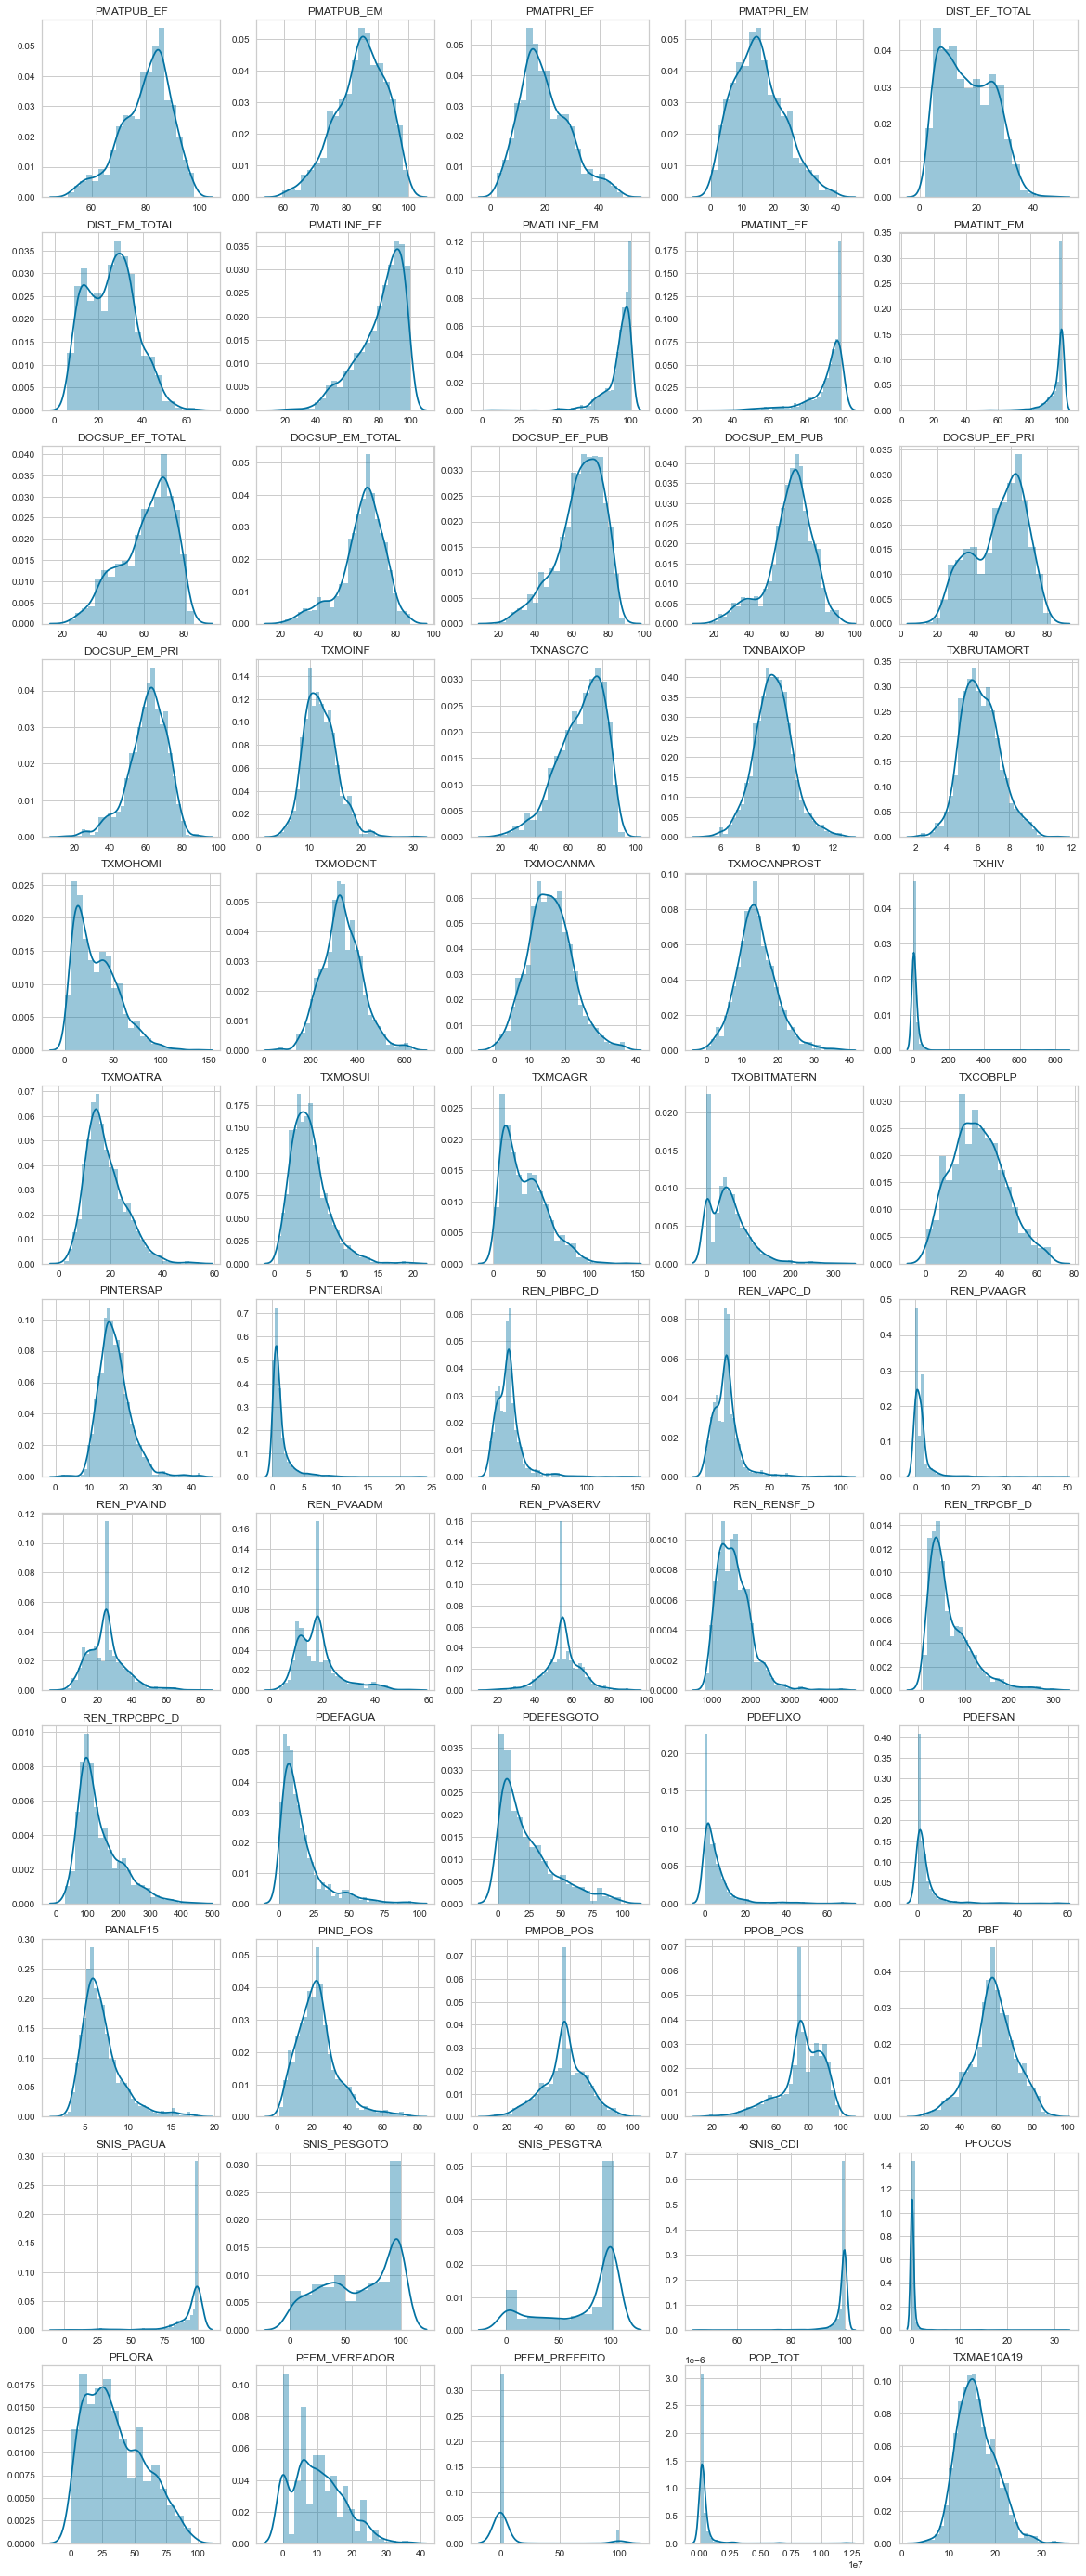

In [24]:
data_distribution(df3)

É possivel identificar que alguns campos possuem uma distribuição com formato que lembra uma distribuição normal, enquanto que outros apresentam distribuições mais próximas de uma distribuição exponencial.

In [25]:
def data_box_plot(df):

    x = 12
    y = 5

    fig, ax = plt.subplots(x, y, figsize=(20, 50))
    col = 0
    column = df.columns

    for i in range(x):

        for j in range(y):

            sns.boxplot(df[column[col]], ax=ax[i][j])
            ax[i][j].set_title(*[column[col]])
            ax[i][j].set(xlabel=None)
            ax[i][j].set(ylabel=None)
            col += 1

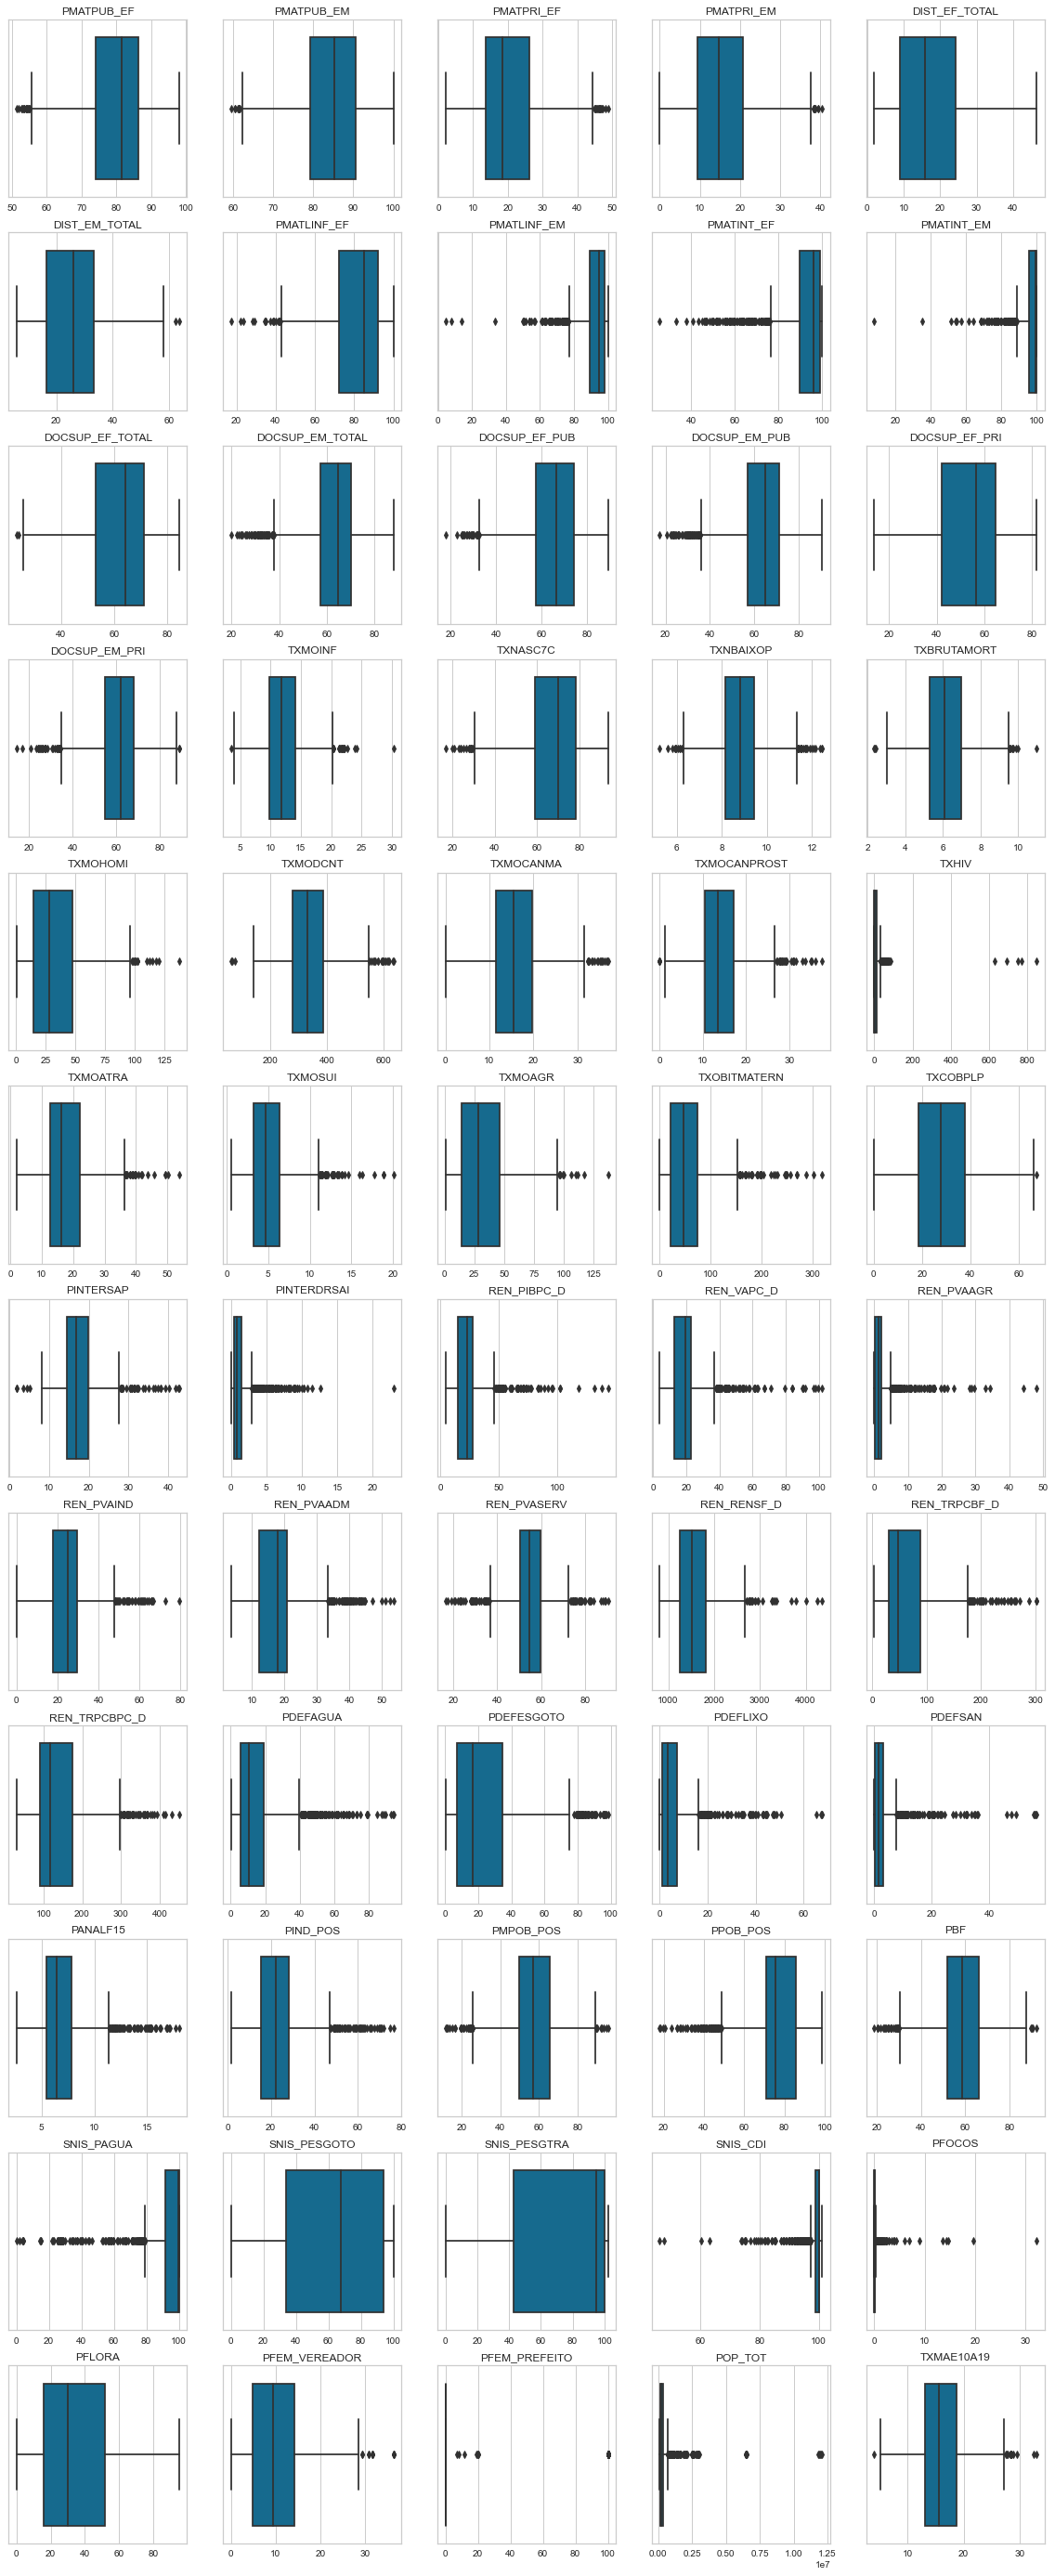

In [26]:
data_box_plot(df3)

Também é possível identificar que, no geral, as características tendem a apresentar outliers.

### Handling features with multicollinearity

#### Dropping features with high correlation

A fim de diminuir a variância do modelo preditivo que será construído posteriormente, é necessário realizar uma tratativa nos dados, de forma que não hajam pares de características que ofereçam uma mesma informação. Para isso, é necessário que sejam calculadas as correlações entre os dados, a fim de identificar pares de características que possuam alta associação entre si. Como há muitas características que não apresentam sinais de seguirem uma distribuição normal, foi escolhida a correlação de Kendall-Tau para realizar essa análise.

In [29]:
def corr_matrix(df):

    corr = df.corr(method = 'kendall')

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(20, 15))

    sns.heatmap(corr, mask = mask,vmin = -1, vmax=1)

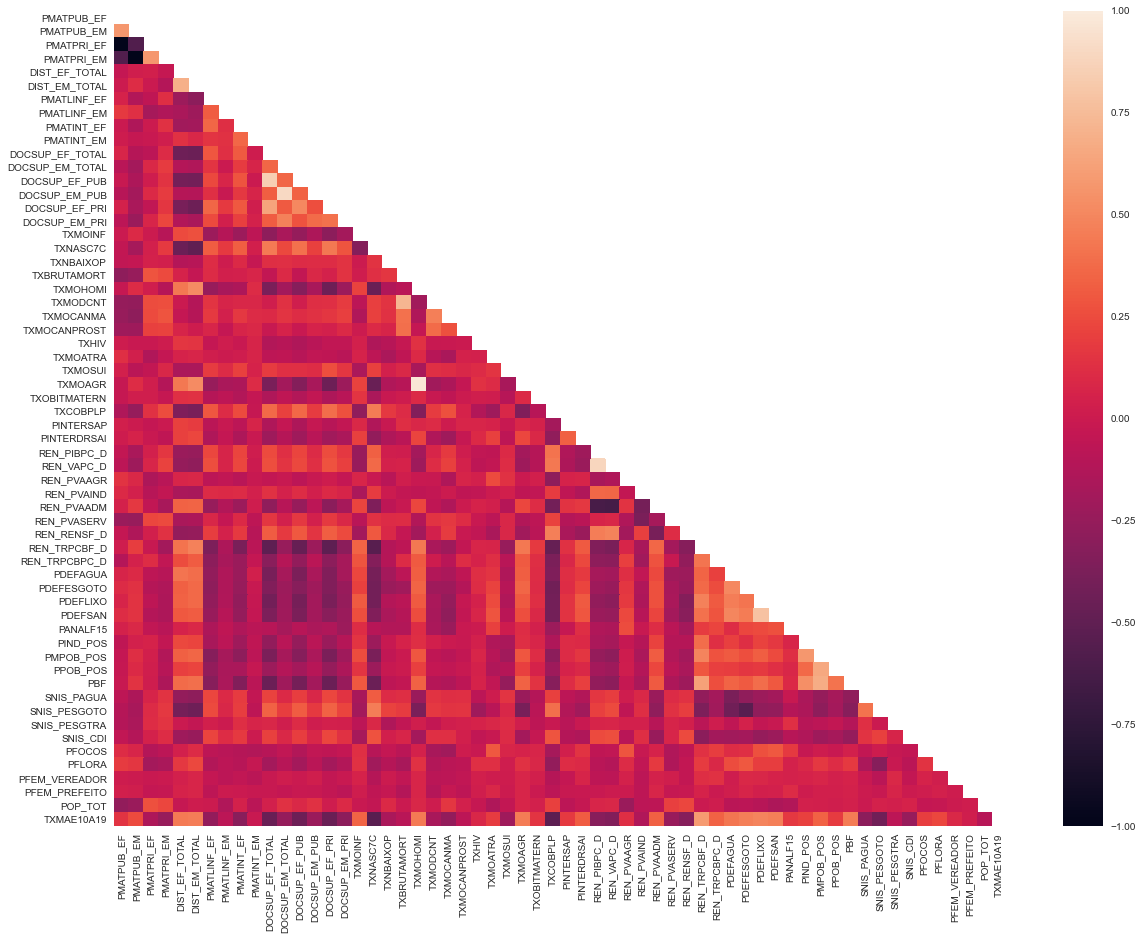

In [30]:
corr_matrix(df3)

É possível ver na matriz que há pares de características cuja correlação está próxima de +1. A função a seguir realiza o cálculo dessa estatística entre cada par e, ao final, retorna uma lista contendo características que tenham correlação maior que 0,9 com alguma outra do conjunto de dados. 

In [31]:
def high_correlated_features(df):

    corr = df.corr(method='kendall')

    columns = np.full((corr.shape[0], ), True, dtype=bool)

    for i in range(corr.shape[0]):

        for j in range(i + 1, corr.shape[0]):

            if corr.iloc[i, j] >= 0.9:

                if columns[j]:

                    columns[j] = False

    dropped_features = list(set(df.columns) - set(df.columns[columns]))

    return dropped_features

In [32]:
high_correlated_features(df3)

['TXMOAGR', 'DOCSUP_EM_PUB']

A função retornou que o Percentual de docentes na rede pública do fundamental com formação adequada (DOCSUP_EM_PUB) e que a Taxa de mortalidade por agressão (TXMOAGR) possuem correlação muito próxima de +1 com alguma outra característica. Sendo assim, estas foram excluídas do modelo.

In [33]:
def drop_features(df,features):
    
    df = df.drop(columns = features)
    
    return df

In [34]:
df4 = drop_features(df3,high_correlated_features(df3))

In [35]:
df4.shape

(1312, 58)

#### Dropping features with correlation close to zero with dependent variable

Como próximo passo, é necessário calcular novamente as correlaçoes entre as características pertentes ao grupo das variáveis independentes com a Taxa de mortalidade por homicídios (TXMOHOMI) e identificar aquelas que possuem correlação muito próxima de zero. Isso é importante para deixar no conjunto de dados apenas variáveis independentes que contribuam com o aumento da performance do modelo, reduzindo o seu ruído.

In [36]:
def low_correlated_features(df, target):

    corr = df.corr(method='kendall')[target]

    corr = corr[(corr < 0.2) & (corr > -0.2)]

    dropped_features = list(corr[(corr < 0.2) & (corr > -0.2)].index)

    return dropped_features

In [37]:
low_correlated_features(df4, 'TXMOHOMI')

['PMATPUB_EF',
 'PMATPUB_EM',
 'PMATPRI_EF',
 'PMATPRI_EM',
 'PMATLINF_EM',
 'PMATINT_EF',
 'PMATINT_EM',
 'DOCSUP_EM_TOTAL',
 'TXNBAIXOP',
 'TXBRUTAMORT',
 'TXMODCNT',
 'TXMOCANMA',
 'TXMOCANPROST',
 'TXHIV',
 'TXMOATRA',
 'TXMOSUI',
 'TXOBITMATERN',
 'PINTERSAP',
 'REN_PIBPC_D',
 'REN_PVAAGR',
 'REN_PVAIND',
 'REN_PVASERV',
 'REN_RENSF_D',
 'PANALF15',
 'PIND_POS',
 'SNIS_PESGTRA',
 'SNIS_CDI',
 'PFOCOS',
 'PFLORA',
 'PFEM_VEREADOR',
 'PFEM_PREFEITO',
 'POP_TOT']

Dentre as características que possuem associação quase nula com a variável alvo e que foram retiradas do conjunto de dados, é possível identificar o Percentual de matrículas no ensino fundamental da rede pública (PMATPUB_EF), a Taxa bruta de mortalidade (TXBRUTAMORT), Taxa de mortalidade por HIV (TXHIV), a Taxa de mortalidade por câncer de mama (TXMOCANMA), a População total do município (POP_TOT), entre outras. 

In [38]:
df5 = drop_features(df4,low_correlated_features(df4, 'TXMOHOMI'))

In [39]:
df5.shape

(1312, 26)

### Data standardization

Por fim, os dados foram padronizados para que ficassem na mesma escala.

In [40]:
def standardization(df):

    df = (df - df.mean()) / df.std()

    return df

In [41]:
df6 = standardization(df5)

## Modelling

A etapa de modelagem foi dividida em duas etapas. Na primeira etapa, foi utilizado um pipeline que faz a seleção das variáveis independentes mais importantes para predição do valor da Taxa de homicídios, assim como a escolha dos melhores hiperparâmetros do modelo. 

O modelo de regressão utilizado foi o XGBoost e a técnica de seleção de hiperparâmetros foi o Grid Search. Para a seleção das melhores características, foram utilizadas três técnicas diferentes: Boruta, Recursive Feature Elimination (RFE) e Recursive Feature Addiction (RFA).

In [42]:
X = df6.drop(columns='TXMOHOMI')
y = df6['TXMOHOMI']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    shuffle=False)

regr_xgb = xgb.XGBRegressor(n_estimators=150,
                        random_state=0,
                        verbosity=0,
                        n_jobs=-1)

param_grid = {
    'learning_rate': [0.1, 0.2],
    'num_leaves': [25, 35],
    'max_depth': [10, 12]
}

### Boruta

In [43]:
def Boruta(X_train,X_test,y_train,y_test,param_grid):

    model = BoostBoruta(regr_xgb, param_grid=param_grid, max_iter=200, perc=100)
    model.fit(X_train,
               y_train,
               eval_set=[(X_test, y_test)],
               early_stopping_rounds=6,
               verbose=0)
    print('Score: ', model.score(X_test, y_test))
    print('Best parameters: ', model.best_params_)
    print('Number of features selected: ', model.n_features_)
    print('Ranking of features: ', model.ranking_)
    
    return model.best_params_, model.ranking_

In [44]:
best_params1, model_ranking1 = Boruta(X_train,X_test,y_train,y_test,param_grid)


8 trials detected for ('learning_rate', 'num_leaves', 'max_depth')

trial: 0001 ### iterations: 00020 ### eval_score: 0.59962
trial: 0002 ### iterations: 00017 ### eval_score: 0.6206
trial: 0003 ### iterations: 00020 ### eval_score: 0.59962
trial: 0004 ### iterations: 00017 ### eval_score: 0.6206
trial: 0005 ### iterations: 00007 ### eval_score: 0.57464
trial: 0006 ### iterations: 00008 ### eval_score: 0.59783
trial: 0007 ### iterations: 00007 ### eval_score: 0.57464
trial: 0008 ### iterations: 00008 ### eval_score: 0.59783
Score:  0.47008423907893004
Best parameters:  {'learning_rate': 0.2, 'num_leaves': 25, 'max_depth': 10}
Number of features selected:  8
Ranking of features:  [4 1 4 4 4 1 1 4 1 1 1 4 1 1 4 4 4 4 4 4 4 4 4 4 4]


In [45]:
def feature_importance(df,features,target,best_params):

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        shuffle=False)

    reg = xgb.XGBRegressor(n_estimators=150,
                           random_state=0,
                           verbosity=0,
                           n_jobs=-1,
                           learning_rate=best_params['learning_rate'],
                           num_leaves=best_params['num_leaves'],
                           max_depth=best_params['max_depth'])

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)

    print('R2: ', r2)
    print('Mean Squared Error: ', mse)

    viz = FeatureImportances(reg)
    viz.fit(X, y)
    viz.show()

R2:  0.4080143539763419
Mean Squared Error:  0.3688840022511524


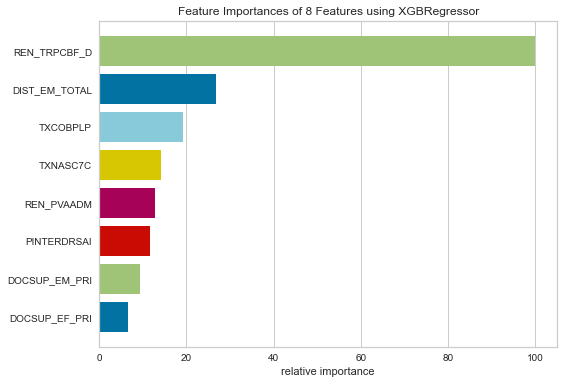

In [46]:
features1 = [
    i for i in [X.columns[i] for i in np.where(model_ranking1 == 1)][0]
]

feature_importance(df6,features1,'TXMOHOMI',best_params1)

### Recursive Feature Elimination (RFE)

In [47]:
def RFE(X_train,X_test,y_train,y_test,param_grid):

    model = BoostRFE(regr_xgb,
                     param_grid=param_grid,
                     min_features_to_select=1,
                     step=1,
                     n_iter=8,
                     sampling_seed=0)
    
    model.fit(X_train,
              y_train,
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=6,
              verbose=0)

    print('Score: ', model.score(X_test, y_test))
    print('Best parameters: ', model.best_params_)
    print('Number of features selected: ', model.n_features_)
    print('Ranking of features: ', model.ranking_)
    
    return model.best_params_, model.ranking_

In [48]:
best_params2, model_ranking2 = RFE(X_train,X_test,y_train,y_test,param_grid)


8 trials detected for ('learning_rate', 'num_leaves', 'max_depth')

trial: 0001 ### iterations: 00028 ### eval_score: 0.57918
trial: 0002 ### iterations: 00026 ### eval_score: 0.58237
trial: 0003 ### iterations: 00028 ### eval_score: 0.57918
trial: 0004 ### iterations: 00026 ### eval_score: 0.58237
trial: 0005 ### iterations: 00016 ### eval_score: 0.58378
trial: 0006 ### iterations: 00012 ### eval_score: 0.58147
trial: 0007 ### iterations: 00016 ### eval_score: 0.58378
trial: 0008 ### iterations: 00012 ### eval_score: 0.58147
Score:  0.4616770738208462
Best parameters:  {'learning_rate': 0.1, 'num_leaves': 25, 'max_depth': 10}
Number of features selected:  15
Ranking of features:  [ 8  1  7  6  9  1  1 11  1  1  1 10  1  1  1  1  4  1  1  1  2  5  1  1
  3]


R2:  0.4500898262295264
Mean Squared Error:  0.3426655141752748


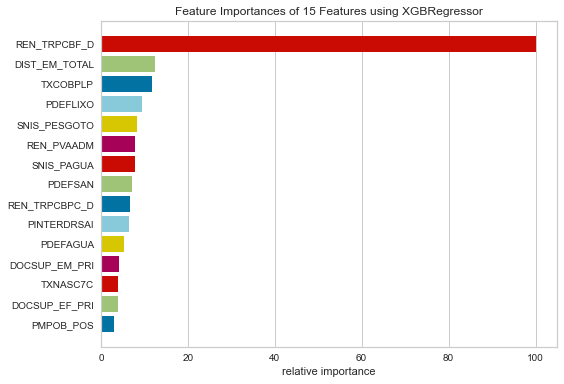

In [49]:
features2 = [
    i for i in [X.columns[i] for i in np.where(model_ranking2 == 1)][0]
]

feature_importance(df6,features2,'TXMOHOMI',best_params2)

### Recursive Feature Addition (RFA)

In [50]:
def RFA(X_train,X_test,y_train,y_test,param_grid):

    model = BoostRFA(regr_xgb,
                     param_grid=param_grid,
                     min_features_to_select=1,
                     step=1,
                     n_iter=8,
                     sampling_seed=0)
    
    model.fit(X_train,
              y_train,
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=6,
              verbose=0)

    print('Score: ', model.score(X_test, y_test))
    print('Best parameters: ', model.best_params_)
    print('Number of features selected: ', model.n_features_)
    print('Ranking of features: ', model.ranking_)
    
    return model.best_params_, model.ranking_

In [52]:
best_params3, model_ranking3 = RFA(X_train,X_test,y_train,y_test,param_grid)


8 trials detected for ('learning_rate', 'num_leaves', 'max_depth')

trial: 0001 ### iterations: 00018 ### eval_score: 0.55549
trial: 0002 ### iterations: 00022 ### eval_score: 0.56319
trial: 0003 ### iterations: 00018 ### eval_score: 0.55549
trial: 0004 ### iterations: 00022 ### eval_score: 0.56319
trial: 0005 ### iterations: 00007 ### eval_score: 0.56264
trial: 0006 ### iterations: 00007 ### eval_score: 0.56808
trial: 0007 ### iterations: 00007 ### eval_score: 0.56264
trial: 0008 ### iterations: 00007 ### eval_score: 0.56808
Score:  0.5048008768732739
Best parameters:  {'learning_rate': 0.1, 'num_leaves': 25, 'max_depth': 10}
Number of features selected:  4
Ranking of features:  [5 2 5 5 5 4 5 5 3 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5]


R2:  0.4406948225009948
Mean Squared Error:  0.34851982263667747


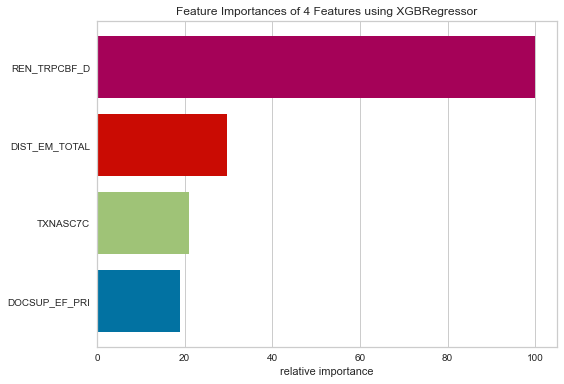

In [53]:
features3 = [
    i for i in [X.columns[i] for i in np.where(model_ranking3 != 5)][0]
]

feature_importance(df6,features3,'TXMOHOMI',best_params3)

## Evaluation

In [54]:
def reg_plot(df5, feature):
    ax = sns.regplot(x='TXMOHOMI',
                     y=feature,
                     data=df5,
                     color='b',
                     line_kws={'color': 'r'})

Ao analisar os resultados, foi possível verificar que a Transferência per capita do Bolsa Família (REN_TRPCBF_D) foi a característica considerada mais importante para a previsão da Taxa de homicídios nas três técnicas utilizadas. Como pode ser visto no gráfico de dispersão abaixo, um aumento na Transferência per capita do Bolsa Família está associada a um aumento na Taxa de homicídios.

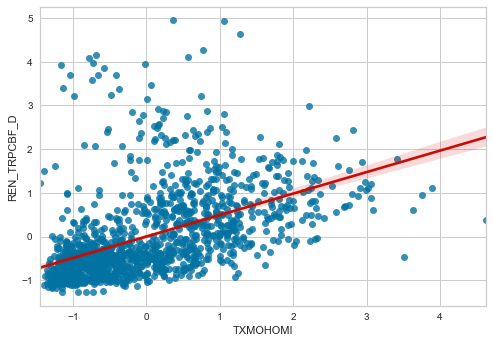

In [55]:
reg_plot(df6,'REN_TRPCBF_D')

Há também outros dois indicadores que merecem ser citados por terem aparecidos entre as cinco características mais bem avaliadas em todos os três modelos. A primeiro deles é o Percentual de pessoas cobertas por planos de saúde suplementar (TXCOBPLP). Como pode ser visto abaixo, um aumento nesse indicador está associado a uma diminuição na Taxa de homicídios.

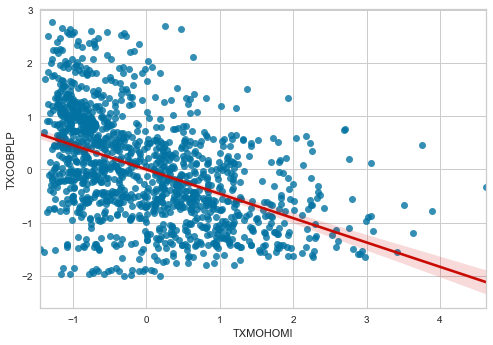

In [56]:
reg_plot(df6,'TXCOBPLP')

Por fim, pode ser visto que um aumento na Distorção idade-série no ensino médio também está associado a um aumento na Taxa de homicídios.

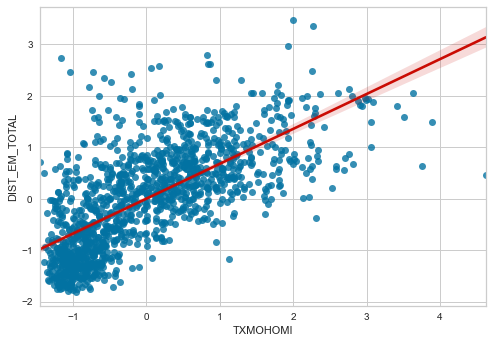

In [57]:
reg_plot(df6,'DIST_EM_TOTAL')